In [10]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 
from sklearn import preprocessing
with open('../res/Staphylococcus_aureus/stats_with_alignment.json') as json_file:
    stats = json.load(json_file)
genome_length = 2900155
average_read_length = 180
num_of_reads = 1294104
original_cov = float(num_of_reads*average_read_length)/genome_length

[Text(0, 0.5, 'N50'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'N-50 to cov box-plot')]

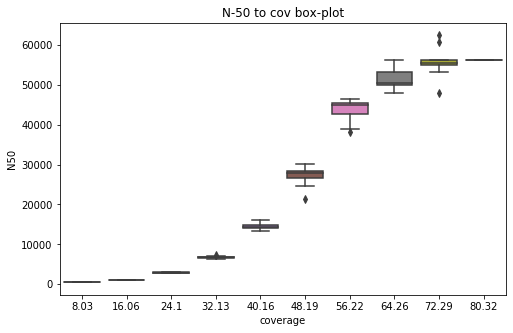

In [20]:
cov = sorted(stats.keys())
cov_fragmented = [round(float(x)*original_cov,2) for x in cov]
N50_scaffolds =list( map(lambda x:([n["Scaffold Stats"]["N50"] for n in stats[x]]), cov))
# N50_contigs = list(map(lambda x:np.mean([n["Contig Stats"]["N50"] for n in stats[x]]), cov))

# scaffolds
plt.figure(figsize=(8, 5))

sns.boxplot(cov_fragmented,N50_scaffolds).set(title= "N-50 to cov box-plot",ylabel="N50",xlabel = "coverage")
# plt.savefig(os.path.join(directory,"N50_scaff.png"))
#contigs
# plt.plot(cov, N50_contigs)
# plt.xlabel("coverage")
# plt.ylabel("N50 avg")
# plt.title("N50 per cov")
# plt.savefig(os.path.join(directory,"N50_contig.png"))

In [21]:
norm_N50 = preprocessing.normalize(N50_scaffolds)

[Text(0, 0.5, 'normlized N50'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'normlized box plot')]

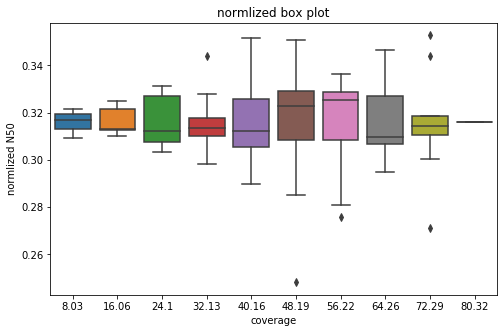

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(cov_fragmented,list(norm_N50)).set(xlabel="coverage", ylabel="normlized N50",title="normlized box plot")



[Text(0, 0.5, 'normlized similarity'),
 Text(0.5, 0, 'coverage'),
 Text(0.5, 1.0, 'normlized box plot')]

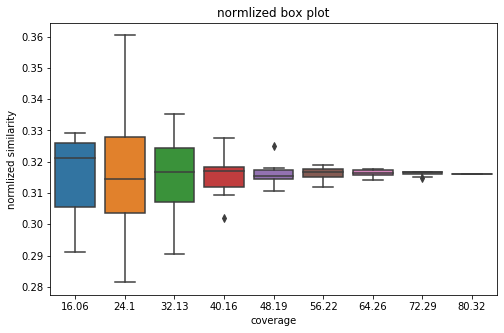

In [30]:
alined_precentage =list( map(lambda x:([n["Gene Alignment"]["total_alined_percentage"] for n in stats[x]]), cov[1:]))
flatten_aligned = [item for sublist in alined_precentage for item in sublist]
flatten_N50 = [item for sublist in N50_scaffolds[1:] for item in sublist]



plt.figure(figsize=(8, 5))
norm_similarity = preprocessing.normalize(alined_precentage)
sns.boxplot(cov_fragmented[1:],list(norm_similarity)).set(xlabel="coverage", ylabel="normlized similarity",title="normlized box plot")




[Text(0, 0.5, 'N50'),
 Text(0.5, 0, 'similarity precentage'),
 Text(0.5, 1.0, 'aligned precentage to N50')]

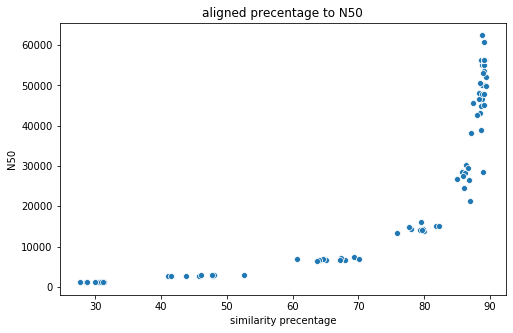

In [31]:
# scatter plot of N50 to total_alined_percentage

plt.figure(figsize=(8, 5))
sns.scatterplot(flatten_aligned,flatten_N50).set(title = "aligned precentage to N50",xlabel="similarity precentage", ylabel="N50")

In [25]:
# pearson correlation between aligned precentage to N50
scipy.stats.pearsonr(flatten_aligned,flatten_N50)

(0.8246372218973932, 1.7178030445233286e-23)